# load imports

In [40]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

# Set all the Constants (hyper parameters)
are hyperparameters that define key aspects of how the training process will be conducted.                                                     
1 BATCH_SIZE:                                                                     

It represents the number of training examples utilized in one iteration. In simple terms, during each iteration of training, the model updates its weights based on a subset of the entire dataset. The choice of batch size can affect training speed and memory requirements.                                                                

2 IMAGE_SIZE:                                                                    

This typically refers to the dimensions (width and height) of the input images. The neural network architecture and the training process often depend on the size of the input images. It's essential to ensure consistency in image size to feed into the network.                                                                  

3 CHANNEL:                                                                                    

It represents the number of color channels in the input images. For example, RGB images have three channels (Red, Green, Blue). Grayscale images have one channel. The number of channels influences the

In [41]:
BATCH_SIZE = 32
IMAGE_SIZE = 255
CHANNEL = 3
EPOCHS = 20

# Import data into tensorflow dataset object
We will use image_dataset_from_directory api to load all images in tensorflow dataset:
                                                                                                                 
1 directory='PlantVillage':
                                                                                             
This parameter specifies the path to the directory containing your image dataset. In this case, it's assumed that the images are stored in the 'PlantVillage' directory.
                                                                            
2 seed=123:

The seed parameter sets the random seed for data shuffling and transformations. Using a fixed seed ensures reproducibility, meaning that if you run the code with the same seed, you should get the same results.
                                                                                               
3 shuffle=True:

The shuffle parameter determines whether to shuffle the data. When set to True, it shuffles the order of the images in each epoch, which is beneficial for training to prevent the model from memorizing the order of the data. 
                                                                                             
4 image_size=(IMAGE_SIZE, IMAGE_SIZE):

image_size sets the dimensions to which the input images will be resized. The IMAGE_SIZE variable likely holds a specific size, ensuring that all images are standardized to the same dimensions before being fed into the neural network.
                                                                                                
5 batch_size=BATCH_SIZE:

The batch_size parameter defines the number of images in each batch during training. It is set to the value of the BATCH_SIZE variable. Training neural networks in batches helps manage memory efficiently and allows for parallel processing, which can speed up training.

In [42]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
directory='PlantVillage',
seed=123,
shuffle = True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE
)

Found 300 files belonging to 3 classes.


In [43]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# Below code:                    
32: The batch size, representing the number of images in the batch.                                                            
255: The height of each image.                                                            
255: The width of each image.                                                        
3: The number of color channels (RGB).                                                 

===============================================
single image                                                                                     
This section shows the pixel values of a single image in the batch. It's a 3D tensor representing the color values of each pixel in the image.                                                                                                                   
Each pixel has three values (RGB) representing the intensity of red, green, and blue, respectively.                                                                            
The values range from 0 to 255, where 0 is the absence of color, and 255 is the maximum intensity of that color.

=================================================                                                            
label                                                                              
This part shows the labels corresponding to the images in the batch. It's a 1D tensor with a shape of (32), indicating the label for each image in the batch.
The labels seem to be integers, ranging from 0 to 2

In [44]:
for image_batch,label_batch in dataset.take(1):
    print("Image Batch Shape : ", image_batch.shape)
    print("Single Image : ", image_batch[0])
    print("Label Image numpy : ", label_batch.numpy)

Image Batch Shape :  (32, 255, 255, 3)
Single Image :  tf.Tensor(
[[[182.       169.       176.      ]
  [182.       169.       176.      ]
  [182.       169.       176.      ]
  ...
  [171.9902   158.9902   167.9902  ]
  [176.97063  163.97063  172.97063 ]
  [180.99219  167.99219  176.99219 ]]

 [[182.       169.       176.      ]
  [182.       169.       176.      ]
  [182.       169.       176.      ]
  ...
  [171.9902   158.9902   167.9902  ]
  [176.97063  163.97063  172.97063 ]
  [180.99219  167.99219  176.99219 ]]

 [[182.       169.       176.      ]
  [182.       169.       176.      ]
  [182.       169.       176.      ]
  ...
  [171.9902   158.9902   167.9902  ]
  [176.97063  163.97063  172.97063 ]
  [180.99219  167.99219  176.99219 ]]

 ...

 [[ 31.        32.960815  44.97061 ]
  [ 31.        32.960815  44.97061 ]
  [ 31.        32.960815  44.97061 ]
  ...
  [180.7551   167.7551   174.7551  ]
  [155.27945  142.27945  149.27945 ]
  [174.04135  161.04135  168.04135 ]]

 [[ 29.0

In [45]:
len(class_names)

3

# Visualize some of the images from our dataset

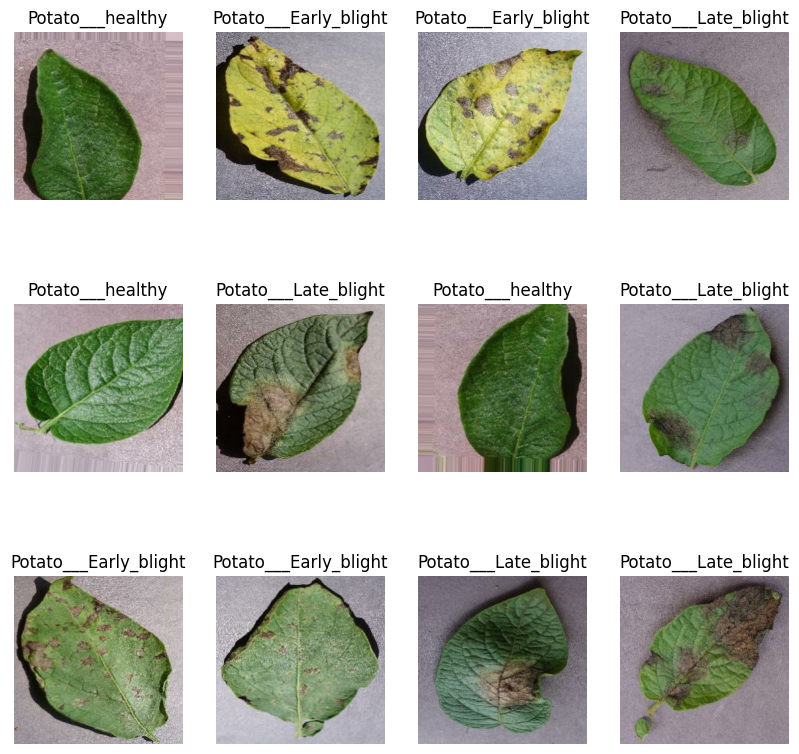

In [46]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    # Code to process the first batch of images and labels
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely:

Training: Dataset to be used while training                                                       
Validation: Dataset to be tested against while training                                                      
Test: Dataset to be tested against after we trained a model                                        

In [47]:
len(dataset)

10

In [48]:
train_size = 0.8
len(dataset) * train_size

8.0

In [49]:
train_ds = dataset.take(54)
len(train_ds)

10

In [50]:
test_ds = dataset.skip(54)
len(test_ds)

0

In [51]:
val_size = 0.1
len(dataset)*val_size

1.0

In [52]:
val_ds = test_ds.take(6)
len(val_ds)

0

In [53]:
test_ds = test_ds.skip(6)
len(test_ds)

0

In [54]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [55]:
len(train_ds)

8

In [56]:
len(val_ds)

1

In [57]:
len(test_ds)

1

# Cache, Shuffle, and Prefetch the Dataset
additional transformations is commonly used in TensorFlow to optimize the performance of the input pipeline when training machine learning models

In [58]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Building the Model
Creating a Layer for Resizing and Normalization
Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

In [59]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

# Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [60]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

# Applying Data Augmentation to Train Dataset

In [61]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# Model Architecture
We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

In [62]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [63]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 255, 255, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 253, 253, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 126, 126, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 124, 124, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

# Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [64]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [65]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
8/8 [==============================] - 17s 2s/step - loss: 1.0922 - accuracy: 0.3242 - val_loss: 1.0997 - val_accuracy: 0.2188
Epoch 2/20
8/8 [==============================] - 12s 1s/step - loss: 1.0194 - accuracy: 0.4258 - val_loss: 1.0605 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 11s 1s/step - loss: 0.8434 - accuracy: 0.6211 - val_loss: 0.8580 - val_accuracy: 0.4688
Epoch 4/20
8/8 [==============================] - 12s 1s/step - loss: 0.7451 - accuracy: 0.6523 - val_loss: 0.7628 - val_accuracy: 0.5938
Epoch 5/20
8/8 [==============================] - 13s 2s/step - loss: 0.5960 - accuracy: 0.6875 - val_loss: 0.6826 - val_accuracy: 0.6562
Epoch 6/20
8/8 [==============================] - 12s 1s/step - loss: 0.5228 - accuracy: 0.7656 - val_loss: 0.5633 - val_accuracy: 0.7188
Epoch 7/20
8/8 [==============================] - 13s 2s/step - loss: 0.3998 - accuracy: 0.8242 - val_loss: 0.5242 - val_accuracy: 0.6562
Epoch 8/20
8/8 [==================

In [66]:
scores = model.evaluate(test_ds)

1/1 [==============================] - 1s 554ms/step - loss: 0.2875 - accuracy: 0.9375


In [67]:
model.save("model.h5")

# Plotting the Accuracy and Loss Curves

In [68]:
print(history)
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 20, 'steps': 8}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [69]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.0922411680221558,
 1.0194447040557861,
 0.843413233757019,
 0.7451317310333252,
 0.5959638357162476]

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

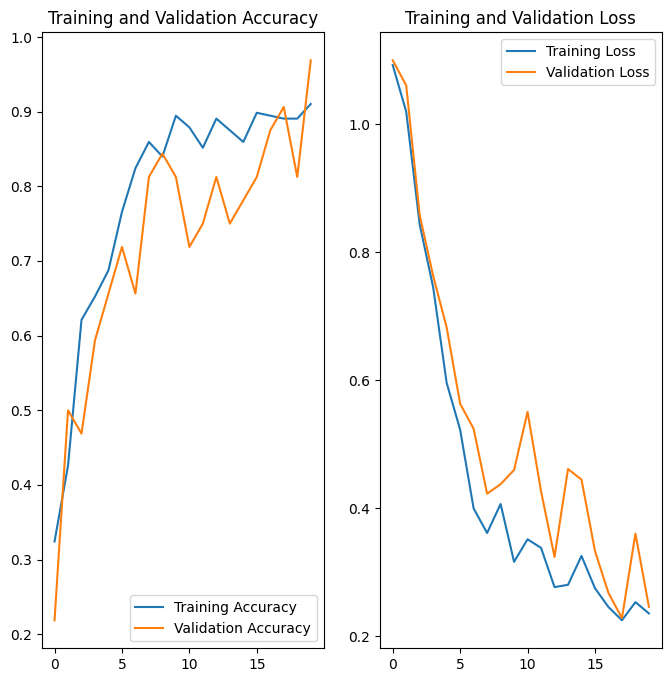

In [71]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Run prediction on a sample image

In [72]:
model = tf.keras.models.load_model('model.h5')

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 423ms/step
predicted label: Potato___Early_blight


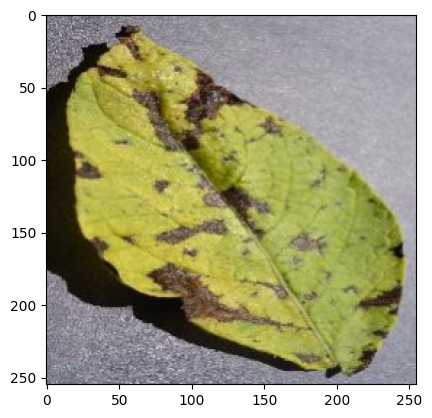

In [73]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# Write a function for inference

In [74]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


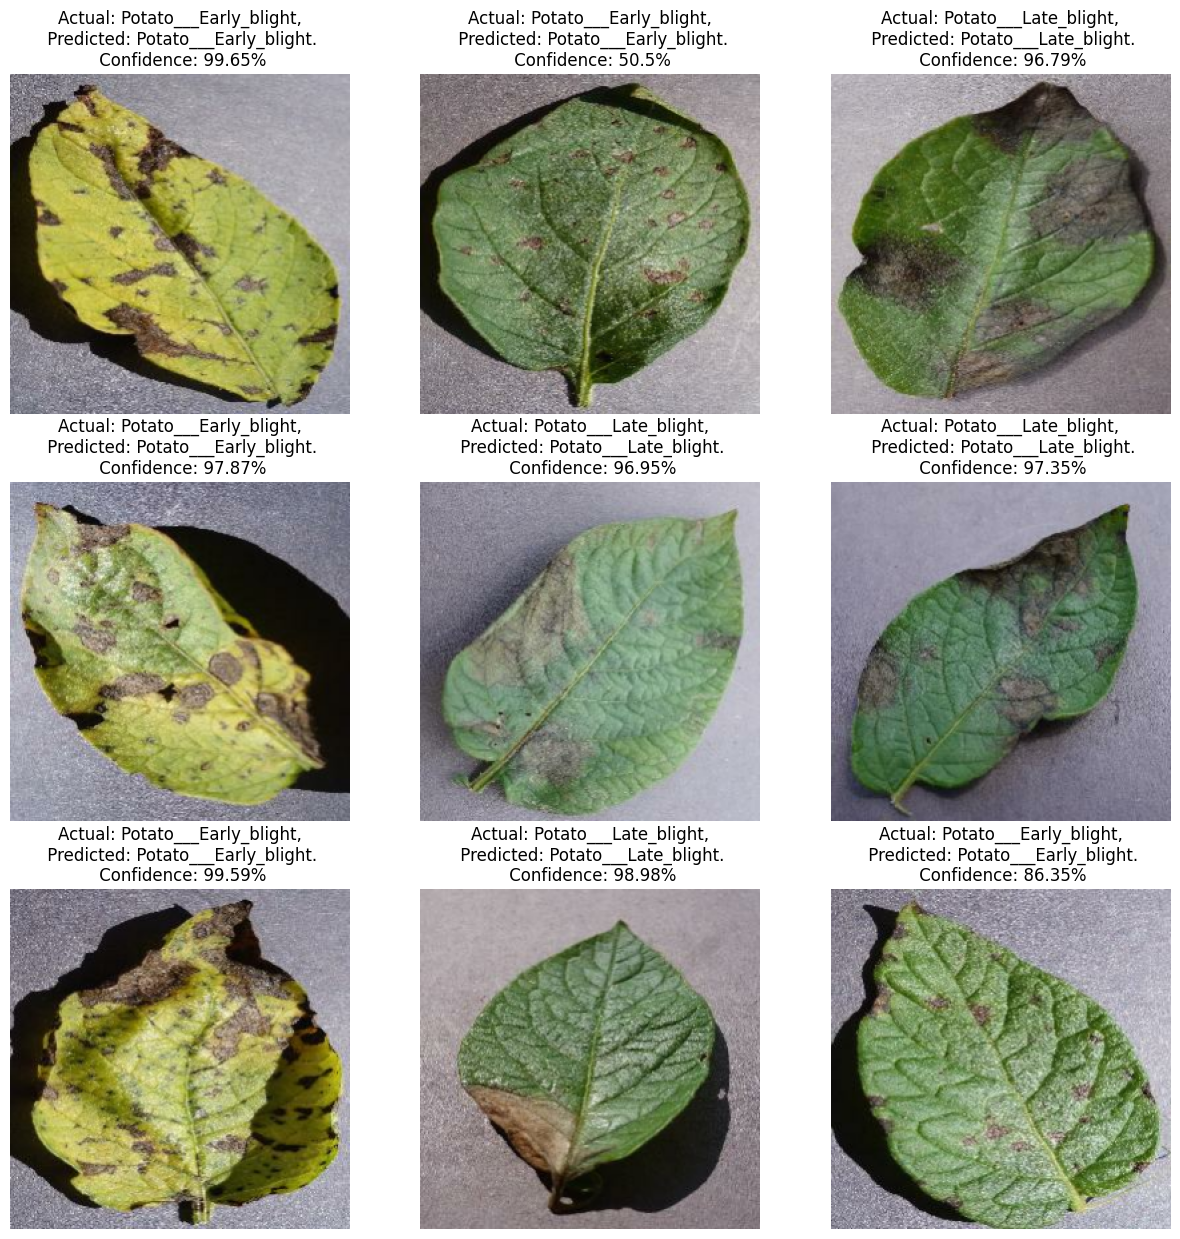

In [75]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")